In [4]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [6]:
# Path to the training images
train_path = '/content/grive/MyDrive/AimSeg_Training_Data/raw/'

# Read the list of file names
train_filenames = [x for x in os.listdir( train_path ) if x.endswith(".tif")]

print( 'Images loaded: ' + str( len(train_filenames)) )

Images loaded: 10


Text(0.5, 1.0, 'Full-size training image')

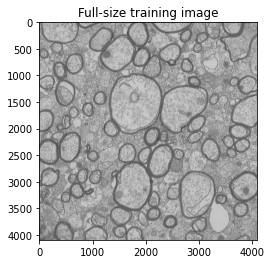

In [7]:
from skimage.util import img_as_float32
from skimage import io
from matplotlib import pyplot as plt

# read training images
train_img = [ img_as_float32( io.imread( train_path + x ) ) for x in train_filenames ]

# display first image
plt.imshow( train_img[0], 'gray' )
plt.title( 'Full-size training image' )

In [49]:
import os
from glob import glob
from skimage.util import img_as_float32
from skimage import io
from matplotlib import pyplot as plt

In [114]:
def show_two_images(title, image1, image2):
    f, axarr = plt.subplots(1, 2)   # we need two images in a row
    f.suptitle(title, fontsize=12)
    axarr[0].set_title( 'image' )
    axarr[0].imshow(image1, cmap='gray')
    axarr[1].set_title( 'labels' )
    axarr[1].imshow(image2, cmap='nipy_spectral')
    #_ = [ax.axis('off') for ax in axarr]   # remove the axis ticks
    plt.show()

In [119]:
def visualize_data(root):
    image_paths = glob(os.path.join(root, "raw", "*.tif"))
    image_paths.sort()
    semantic_paths = glob(os.path.join(root, "semantic_labels", "*.png"))
    semantic_paths.sort()

    for im, sem in zip(image_paths, semantic_paths):
        image = img_as_float32(io.imread(im))
        semantic_labels = io.imread(sem)
        #assert semantic_labels.shape == image.shape
        show_two_images(os.path.basename(im).split('.')[0], image, semantic_labels)
        print("Shape:", image.shape, semantic_labels.shape)
        
        # display first image
        #plt.imshow( image, cmap='gray' )
        #plt.title( os.path.basename(im).split('.')[0] )
            
        # display first label
        #plt.imshow( semantic_labels, cmap='nipy_spectral' )
        #plt.title( os.path.basename(im).split('.')[0] )



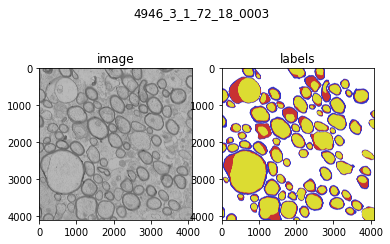

Shape: (4095, 4096) (4095, 4096, 4)


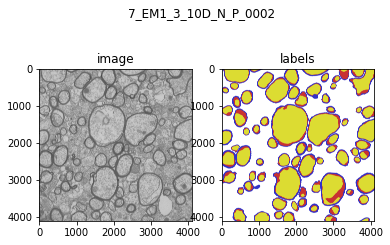

Shape: (4094, 4094) (4094, 4094, 4)


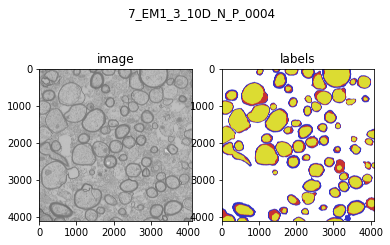

Shape: (4096, 4096) (4096, 4096, 4)


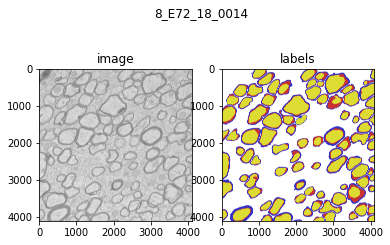

Shape: (4096, 4096) (4096, 4096, 4)


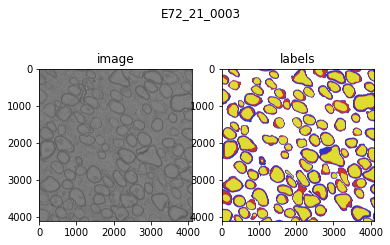

Shape: (4096, 4096) (4096, 4096, 4)


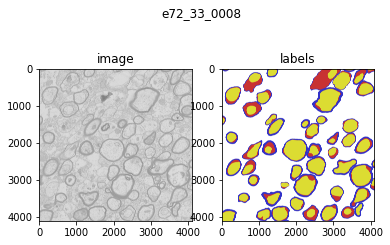

Shape: (4096, 4096) (4096, 4096, 4)


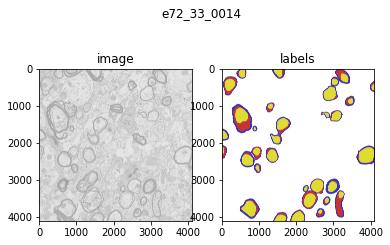

Shape: (4096, 4096) (4096, 4096, 4)


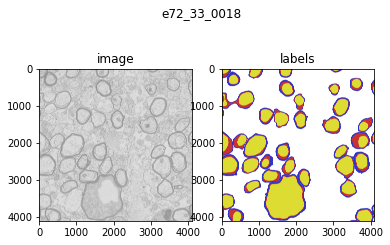

Shape: (4096, 4096) (4096, 4096, 4)


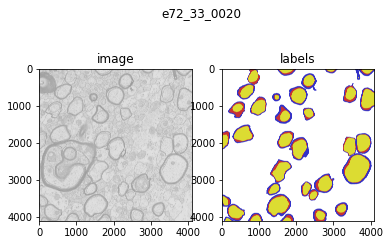

Shape: (4096, 4096) (4096, 4096, 4)


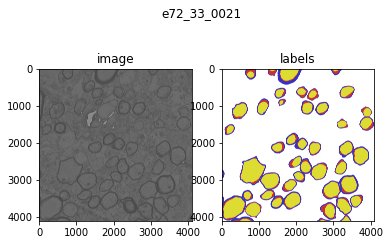

Shape: (4096, 4096) (4096, 4096, 4)


In [120]:
root_path = "/content/grive/MyDrive/AimSeg_Training_Data"
visualize_data(root_path)